In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Reading image

(-0.5, 255.5, 255.5, -0.5)

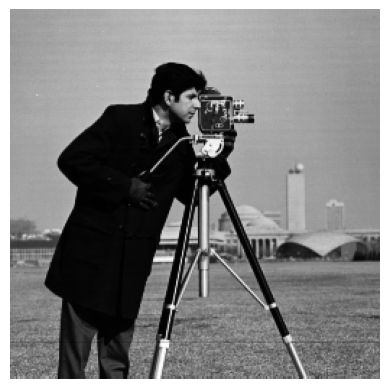

In [18]:
# image = np.array([[1,   8,   4,   3,   4,],
#                      [1,   1,   1,   7,   8],
#                   [8,   8,   3,   3,   1],
#                     [2,   2,   1,   5,   2],
#                     [1,   1,   8,   5,   2]])
image = cv2.imread('./Fig0222(b)(cameraman).tif',0)
plt.imshow(image, 'gray')
plt.axis('off')

In [19]:
#creating a list to store intensity counts
counts = np.zeros((1,256))
# print(counts.shape)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
#         print(image[i,j])
        counts[0,image[i,j]] += 1

In [20]:
#Normailizing the counts or dividing the counts by total number of pixels in image
Normailize_counts = counts/(image.shape[0]*image.shape[1])
print(Normailize_counts.sum())

1.0


In [21]:
#creating a list to hold PDF.
pdf_count = np.zeros((counts.shape[0], counts.shape[1]))
pdf_count.shape
for i in range(1, counts.shape[1]):
#     print(Normailize_counts[0,i-1], Normailize_counts[0,i],)
#     print(Normailize_counts[0,i-1] + Normailize_counts[0,i])
    pdf_count[0,i]= pdf_count[0,i-1]+Normailize_counts[0,i]
#     print(pdf_count[0,i])

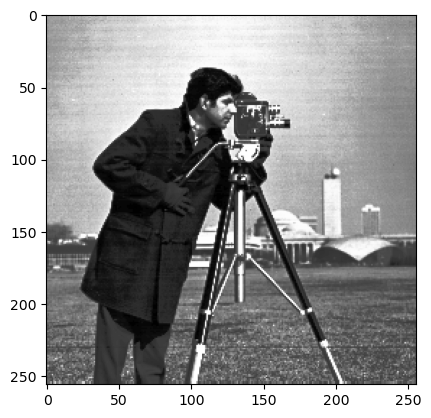

(-0.5, 255.5, 255.5, -0.5)

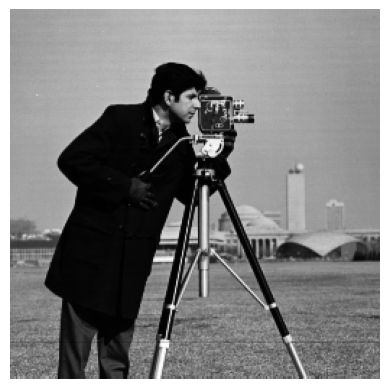

In [22]:
#mapping the new intensity values.
result = np.zeros((image.shape[0], image.shape[1]))
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        result[i,j] = pdf_count[0,image[i,j]]*255
plt.imshow(result, 'gray'); plt.show(); plt.axis('off');
plt.imshow(image, 'gray'); plt.axis('off')

In [2]:
def show(img, title='None'):
    plt.title(title)
    plt.axis('off')
    plt.imshow(img, 'gray'); plt.show()

#### Equation for Local enhancement using statistical approach.
    - mean is global mean of image
    - std is global standard deviation of image
    - m is mean of the consider region of the image.
    - s is the standard deviation of consider region of the image.
    - k(s) and C are constants.
    
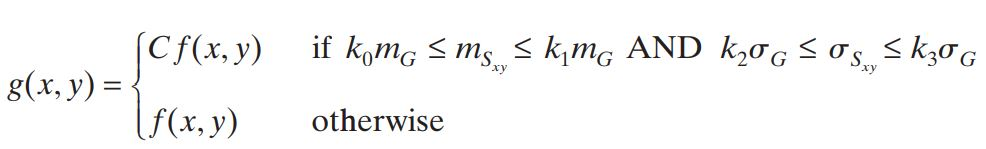

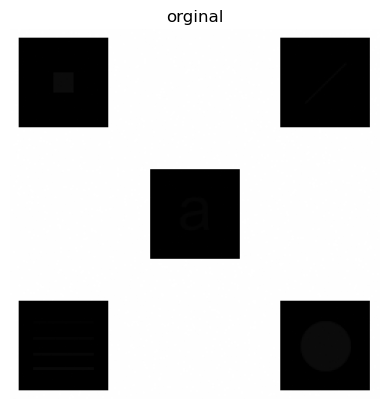

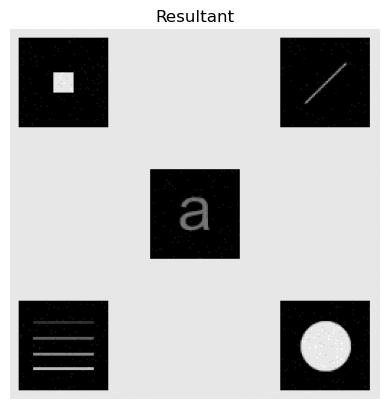

In [4]:
img = cv2.imread('./Fig0326(a)(embedded_square_noisy_512).tif', 0)
result = np.zeros((img.shape[0], img.shape[1]))
img2 = np.pad(img, (2,2))
mg = img.mean()
sg = np.std(img)
k0,k1,k2,k3 = 0, 0.1,0,0.1
c = 22.8
show(img, 'orginal')

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        ml = img2[i:i+3,j:j+3].mean()
        sl = img2[i:i+3,j:j+3].std()
        if k0*mg <= ml and ml<= k1*mg and k2*sg<=sl and sl<=k3*sg:
            result[i,j] = c*img[i,j]
        else:
            result[i,j] = img[i,j]
show(result, 'Resultant')

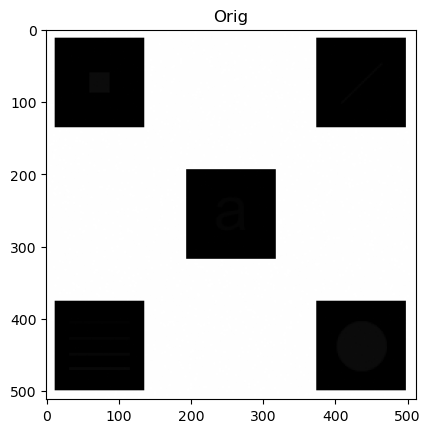

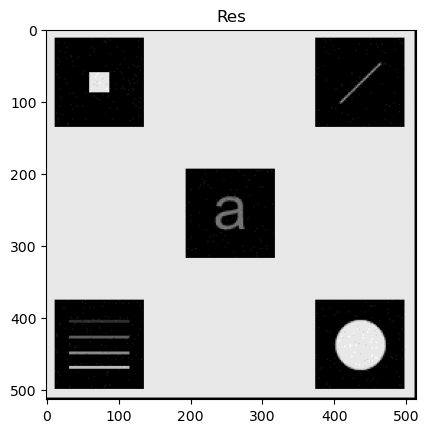

In [8]:
img = cv2.imread('./Fig0326(a)(embedded_square_noisy_512).tif', 0)
img1 = np.pad(img, (1,1), 'constant')
mean = img.mean()
std = img.std()

result = np.zeros((img1.shape[0], img1.shape[1]))
k0, k1,k2,k3 = 0, 0.1,0,0.1
c = 22.8

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        m = np.mean(img1[i:i+3, j:j+3])
        s = np.std(img1[i:i+3, j:j+3])
        
        if k0*mean<=m and m<=k1*mean and k2*std<=s and s<=k3*std:
            result[i,j] = c*img[i,j]
        else:
            result[i,j] = img[i,j]
plt.imshow(img, 'gray'); plt.title('Orig'); plt.show()
plt.imshow(result, 'gray'); plt.title('Res'); plt.show()

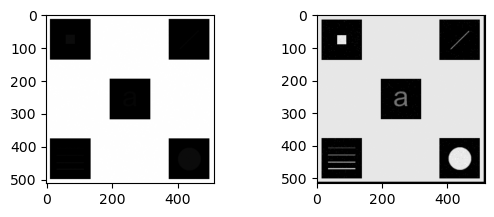

In [11]:
img = cv2.imread('./Fig0326(a)(embedded_square_noisy_512).tif',0)
img2 = np.pad(img,(2,2), 'constant')
mean = img.mean()
std = img.std()
result = np.zeros((img2.shape[0], img2.shape[1]))
k0,k1,k2,k3 = 0,0.1,0,0.1
c=22.8
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        m = np.mean(img2[i:i+3,j:j+3])
        s = np.std(img2[i:i+3, j:j+3])
        if (m>k0*mean and m<k1*mean) and (s>=k2*std and s<=k3*std):
            result[i,j] = img2[i,j]*c
        else:
            result[i,j] = img2[i,j]
plt.subplot(221),plt.imshow(img,'gray');
plt.subplot(222),plt.imshow(result,'gray');

### 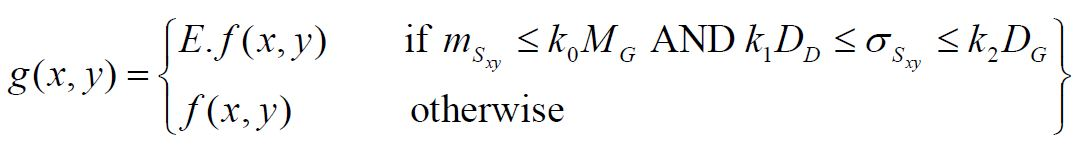

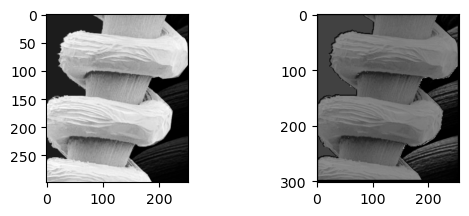

In [12]:
img = cv2.imread('./Fig0327(a)(tungsten_original).tif',0)
img2 = np.pad(img,(2,2), 'constant')
mean = img.mean()
std = img.std()
result = np.zeros((img2.shape[0], img2.shape[1]))
k0,k1,k2 = 0.4,0.02,0.4
e=4.0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        m = np.mean(img2[i:i+3,j:j+3])
        s = np.std(img2[i:i+3, j:j+3])
        if (m<=k0*mean) and (s<=k2*std):
            result[i,j] = img2[i,j]*e
        else:
            result[i,j] = img2[i,j]
plt.subplot(221),plt.imshow(img,'gray');
plt.subplot(222),plt.imshow(result,'gray');

### Averaging image

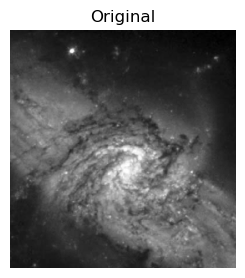

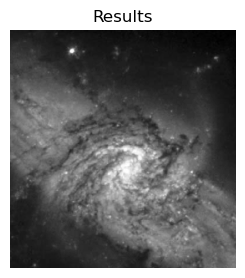

In [13]:
img = cv2.imread('./Fig0226(galaxy_pair_original).tif',0)/255
img2 = img.copy()
img3 = img.copy()
img4 = img.copy()
img5 = img.copy()
img6 = img.copy()
img7 = img.copy()

result = (img+img2+img3+img4+img5+img6+img)/7
plt.subplot(121);
plt.title('Original'); plt.axis('off')
plt.imshow(img, 'gray'); plt.show()
plt.subplot(122)
plt.title('Results'); plt.axis('off')
plt.imshow(result, 'gray'); plt.show()

### Image subtraction

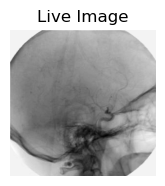

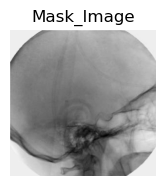

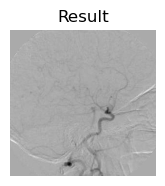

In [14]:
image = cv2.imread('./Fig0228(b)(angiography_live_ image).tif',0)/255
mask = cv2.imread('./Fig0228(a)(angiography_mask_image).tif',0)/255
result = image-mask
plt.subplot(131); plt.axis('off')
plt.title('Live Image'); plt.imshow(image, 'gray')
plt.show()
plt.subplot(132); plt.axis('off');
plt.title('Mask_Image'); plt.imshow(mask, 'gray')
plt.show()
plt.subplot(133); plt.axis('off');
plt.title('Result'); plt.imshow(result, 'gray')
plt.show()

### Image Multiplication

In [3]:
#multiplication
mask = cv2.imread('./Fig0230(b)(dental_xray_mask).tif',0)/255
img = cv2.imread('./Fig0230(a)(dental_xray).tif',0)/255
product = img*mask
# region = img/mask
cv2.imshow('Mask', mask)
cv2.imshow('Original', img)
# cv2.imshow('RegionOfInterst', region)
cv2.imshow('Product', product)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Image Multiplication for superimposing

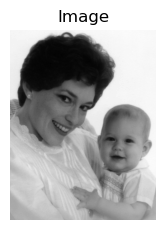

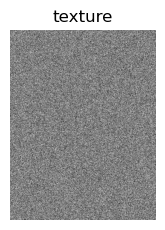

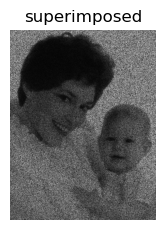

In [19]:
img = cv2.imread('./Fig0636(woman_baby_original).tif',0)
size = img.shape[0], img.shape[1]
random = np.random.randint(0,256,size)
result = img*random
plt.subplot(131); plt.axis('off')
plt.title('Image'); plt.imshow(img, 'gray')
plt.show()
plt.subplot(132); plt.axis('off');
plt.title('texture'); plt.imshow(random, 'gray')
plt.show()
plt.subplot(133); plt.axis('off');
plt.title('superimposed'); plt.imshow(result, 'gray')
plt.show()

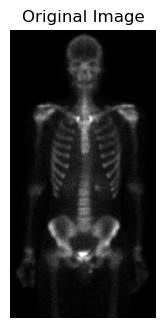

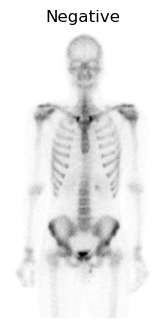

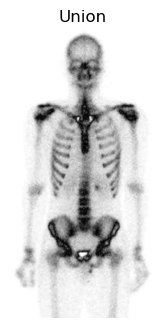

In [20]:
#union
image = cv2.imread('./Fig0232(a)(partial_body_scan).tif',0)
negative = 255-image
union = np.zeros((image.shape[0], image.shape[1]))


for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        union[i,j] = max(image[i,j], negative[i,j])
        

plt.subplot(131); plt.axis('off')
plt.title('Original Image'); plt.imshow(image, 'gray')
plt.show()
plt.subplot(132); plt.axis('off');
plt.title('Negative'); plt.imshow(negative, 'gray')
plt.show()
plt.subplot(133); plt.axis('off');
plt.title('Union'); plt.imshow(union, 'gray')
plt.show()

(356, 413) (356, 413)


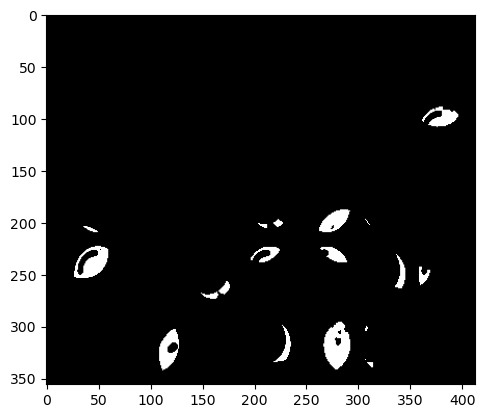

In [21]:
img1 = 255-cv2.imread('./smart.png',0)
img2 = 255-cv2.imread('./smarts.jpg',0)
img2 = cv2.resize(img2, (img1.shape[1],img1.shape[0]))
img1 = np.where(img1>128,255, 0)
img2 = np.where(img2>128, 255, 0)
print(img1.shape, img2.shape)
result = np.zeros((img1.shape[0], img1.shape[1]))
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if (img1[i,j] and img2[i,j])==255:
            result[i,j] = 255
plt.imshow(result, 'gray')


### Logical Operations
### AND Operation

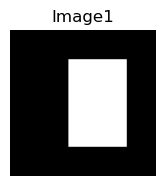

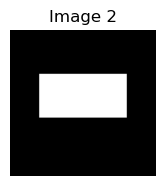

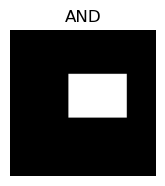

In [22]:
image = np.zeros((500,500))
image2 = np.zeros((500,500))
image[100:400, 200:400]=255
image2[150:300, 100:400]=255
result1 = np.zeros((500,500))
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if (image[i,j] and image2[i,j]) == 255:
            result1[i,j] = 255

plt.subplot(131); plt.axis('off')
plt.title('Image1'); plt.imshow(image, 'gray')
plt.show()
plt.subplot(132); plt.axis('off');
plt.title('Image 2'); plt.imshow(image2, 'gray')
plt.show()
plt.subplot(133); plt.axis('off');
plt.title('AND'); plt.imshow(result1, 'gray')
plt.show()

### OR Operation

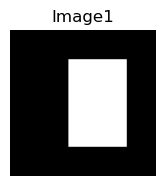

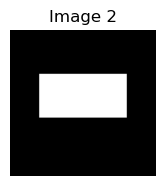

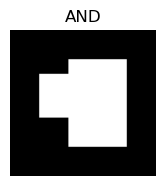

In [23]:
image = np.zeros((500,500))
image2 = np.zeros((500,500))
image[100:400, 200:400]=255
image2[150:300, 100:400]=255
result1 = np.zeros((500,500))
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if (image[i,j] or image2[i,j]) == 255:
            result1[i,j] = 255

plt.subplot(131); plt.axis('off')
plt.title('Image1'); plt.imshow(image, 'gray')
plt.show()
plt.subplot(132); plt.axis('off');
plt.title('Image 2'); plt.imshow(image2, 'gray')
plt.show()
plt.subplot(133); plt.axis('off');
plt.title('AND'); plt.imshow(result1, 'gray')
plt.show()

### Not Operation

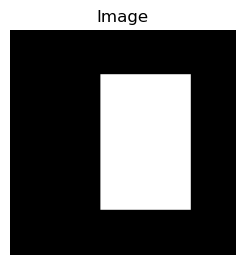

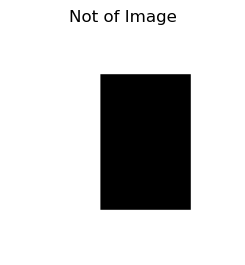

In [24]:
image = np.zeros((500,500))
image[100:400, 200:400]=255

result = np.zeros((500,500))
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i,j] == 0:
            result[i,j] = 255

plt.subplot(121); plt.axis('off')
plt.title('Image'); plt.imshow(image, 'gray')
plt.show()
plt.subplot(122); plt.axis('off');
plt.title('Not of Image'); plt.imshow(result, 'gray')
plt.show()

### Spatial Filtering

In [25]:
img = cv2.imread('./Fig0237(a)(characters test pattern)_POST.tif')
frame = np.zeros((img.shape[0], img.shape[1], img.shape[2]), dtype = 'uint8')

for i in range(img.shape[0]-1):
    for j in range(img.shape[1]-1):
        if i == 0 and j == 0:
            frame[i,j] = (img[i,j] + img[i,j+1] + img[i+1,j] + img[i+1, j+1])/4
        elif i == 0 and j==511:
            frame[i,j] = (img[i,j] + img[i,j-1] + img[i+1,j] + img[i+1, j-1])/4
        elif i == 511 and j == 511:
            frame[i,j] = (img[i,j] + img[i,j-1] + img[i-1,j] + img[i-1,j-1])/4
        elif i == 511 and j == 0:
            frame[i,j] = (img[i,j] + img[i-1, j] + img[i, j+1] + img[i-1, j+1])/4
        elif i == 0 and (j>0 and j<511):
            frame[i,j] = (img[i,j] + img[i,j+1] + img[i+1, j+1] + img[i+1,j] + img[i+1,j-1] + img[i,j-1])/6
        elif i == 511 and (j>0 and j<511):
            frame[i,j] = (img[i,j] + img[i-1, j] + img[i,j-1] + img[i,j+1] + img[i-1,j+1] + img[i-1, j-1])/6
        elif (i>0 and i<511) and j==511:
            frame[i,j] = (img[i,j] + img[i-1,j] + img[i+1, j] + img[i+1, j-1] + img[i,j-1] + img[i-1,j-1])/6
        elif (i>0 and i<511) and j == 0:
            frame[i,j] = (img[i,j] + img[i-1,j] + img[i+1,j] + img[i-1, j+1] + img[i+1,j+1] + img[i, j+1])/6
        else:    
            frame[i,j] = (img[i,j] + img[i,j-1] + img[i,j+1] + img[i-1, j] + img[i+1, j] + img[i-1,j-1] + img[i-1, j+1] + img[i+1,j+1] + img[i+1, j-1])/9
cv2.imshow('Original', img)
cv2.imshow('Average', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [112]:
#correlation
img = cv2.imread('./Fig0237(a)(characters test pattern)_POST.tif', 0)
arr = np.ones((3,3), dtype = 'uint8')
result = img.copy()
mask = arr/9

for i in range(img.shape[0]-1):
    for j in range(img.shape[1]-1):
        if i==0 and j == 0:    #For image origin top-left corner..
            result[i,j] = img[i,j]*mask[1,1] + img[i,j+1]*mask[1,2] + img[i+1, j] * mask[2, 1] + img[i+1,j+1]*mask[2,2]
        elif i==0 and (j>0 and j<1192):   #along first row...
            result[i,j] = img[i,j]*mask[1,1] + img[i,j+1] *mask[1,2] + img[i,j-1]*mask[1,0] + img[i+1,j]*mask[2,1] + img[i+1,j-1]*mask[2,0] + img[i+1,j+1]*mask[2,2]    
        elif i==0 and j==1192:   # for top-right
            result[i,j] = img[i,j] * mask[1,1] + img[i,j-1] * mask[1,0] + img[i+1,j] * mask[2,0] + img[i+1, j] * mask[2,2]
        elif i>0 and j==1192:  #along the right most column
            result[i,j] = img[i,j]*mask[1,1] + img[i+1,j]*mask[2,1] + img[i-1,j]*mask[0,1] + img[i,j-1]*mask[1,0] + img[i-1,j-1]*mask[0,0]+img[i+1,j-1]*mask[2,0]
        elif i==500 and j == 1192:    #for bottom right corner
            result[i,j] = img[i,j]*mask[1,1] + img[i,j-1]*mask[1,0] + img[i-1,j]*mask[0,1] + img[i-1,j-1]*mask[0,0]
        elif i == 499 and (j>0 and j<1191):   #alang the bottom most row
            result[i,j] = img[i,j]*mask[1,1] + img[i,j-1]*mask[1,0] + img[i,j+1]*mask[1,2] + img[i-1,j]*mask[0,1] + img[i-1,j-1] *mask[0,0] + img[i-1,j+1]*mask[0,2]
        elif i==499 and j==1191:    #bottom left corner
            result[i,j] = img[i,j]*mask[1,1] + img[i,j+1]*mask[1,2] + img[i-1,j]*mask[0,1] + img[i-1,j+1]*mask[0,2]
        elif (i>0 and i<499) and j==0: #along left most column
            result[i,j] = img[i,j]*mask[1,1] + img[i+1,j]*mask[2,1] + img[i-1,j]*mask[0,1] + img[i,j+1]*mask[1,2] + img[i+1,j+1]*mask[2,2] + img[i-1,j+1]*mask[0,2]
        else:
            result[i,j] = img[i,j]*mask[1,1] + img[i-1,j-1]*mask[0,0] + img[i-1,j]*mask[0,1] + img[i-1,j+1]*mask[0,2] + img[i,j-1]*mask[1,0] + img[i,j+1]*mask[1,2] + img[i+1,j-1]*mask[2,0] + img[i+1,j]*mask[2,1] + img[i+1,j+1]*mask[2,2]
cv2.imshow('Original', img)
cv2.imshow('After Filter', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Guassian Filter

In [26]:
#correlation
image = cv2.imread('./hubble.tif', 0)
img = np.pad(image, (1,1), 'constant')
arr = np.ones((3,3), dtype = 'uint8')
result = img.copy()
mask = arr/9

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        result[i,j] = img[i,j]*mask[1,1] + img[i-1,j-1]*mask[0,0] + img[i-1,j]*mask[0,1] + img[i-1,j+1]*mask[0,2] + img[i,j-1]*mask[1,0] + img[i,j+1]*mask[1,2] + img[i+1,j-1]*mask[2,0] + img[i+1,j]*mask[2,1] + img[i+1,j+1]*mask[2,2]
cv2.imshow('Original', img)
cv2.imshow('After Filter', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
#convolution
img = cv2.imread('./Fig0237(a)(characters test pattern)_POST.tif', 0)
img2 = np.pad(img, (1,1), 'constant')
result =img.copy()
mask = np.array([[0.3679,0.6065,0.3679],[0.6065,1.0000,0.6065],[0.3679,0.6065,0.3679]], dtype = 'uint8')
# mask = np.ones((3,3), dtype = 'uint8')    #this mask is same as for the above correlation
a = 2
rt_mask=mask.copy()
for i in range(3):
    rt_mask[i]=mask[a]
    a -= 1
kernel = rt_mask.copy()
for j in range(3):
    kernel[j,0] = rt_mask[j,2]
    kernel[j,2] = rt_mask[j,0]
kernel = kernel/4.8976
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        result[i,j] = img2[i,j]*kernel[1,1] + img2[i-1,j-1]*kernel[0,0] + img2[i-1,j]*kernel[0,1] + img2[i-1,j+1]*kernel[0,2] + img2[i,j-1]*kernel[1,0] + img2[i,j+1]*kernel[1,2] + img2[i+1,j-1]*kernel[2,0] + img2[i+1,j]*kernel[2,1] + img2[i+1,j+1]*kernel[2,2]
cv2.imshow('Original', img)
cv2.imshow('Processed', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
def corr2d(X, K):
    h, w = K.shape
    Y =np.zeros((X.shape[0]-h+1, X.shape[1]-w+1))
    print(Y.shape)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i,j] = (X[i:i+h, j:j+w]*K).sum()
    return Y

img = cv2.imread('./Fig0237(a)(characters test pattern)_POST.tif', 0)
img2 = np.pad(img, (1,1), 'constant')
mask = np.array([[0.3679,0.6065,0.3679],[0.6065,1.0000,0.6065],[0.3679,0.6065,0.3679]], dtype = 'uint8')

result = corr2d(img2, mask)
cv2.imshow('Original', img)
cv2.imshow('Processed', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

(688, 688)


### Mean Filter
    Mean filter is used for blurring the image..
    in mean blur the central value has more contribution than other values therefore it is known as mean filter.
    to increase the effect of blurring we increase the size of mask... which will blur the image more accurate
    1.Mask should be odd oredered
    2. all the values should be same other than central value.
    3. smoothing kernal should have sum equal to 1

In [29]:
img = cv2.imread('./Fig0335(a)(ckt_board_saltpep_prob_pt05).tif', 0)
img2 = np.pad(img,(1,1), 'constant')
mask = np.ones((3,3), dtype = 'uint8')
temp = np.zeros((3,3), dtype = 'uint8')
result = img.copy()
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        temp[0,0] = img2[i,j]*mask[0,0]
        temp[0,1] = img2[i,j+1]*mask[0,1]
        temp[0,2] = img2[i,j+2]*mask[0,2]
        temp[1,0] = img2[i+1,j]*mask[1,0]
        temp[1,1] = img2[i+1,j+1]*mask[1,1]
        temp[1,2] = img2[i+1,j+2]*mask[1,2]
        temp[2,0] = img2[i+2,j]*mask[2,0]
        temp[2,1] = img2[i+2,j+1]*mask[2,1]
        temp[2,2] = img2[i+2,j+2]*mask[2,2]
        temp.sort()
        result[i,j]=temp[1,1]
cv2.imshow('Original', img)
cv2.imshow('Median Filtered',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
img = cv2.imread('./Fig0222(b)(cameraman).tif',0)
img2 = np.pad(img,(1,1),'constant')
result = img.copy()
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        result[i,j] = img2[i+1,j] +img2[i,j+1] - 2*img2[i,j]
cv2.imshow('original', img)
cv2.imshow('Filtered',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\kaleem ullah\AppData\Local\Temp\ipykernel_14012\312969246.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  result[i,j] = img2[i+1,j] +img2[i,j+1] - 2*img2[i,j]


In [32]:
img = cv2.imread('./Fig0236(a)(letter_T).tif',0)
img2 = np.pad(img,(1,1), 'constant')
kernel = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
result = np.zeros((img.shape[0], img.shape[1]))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        result[i,j] = img2[i,j]*kernel[1,1]+img2[i,j+1]*kernel[1,2]+img2[i,j-1]*kernel[1,0] +img2[i+1,j]*kernel[0,1] + img2[i+1,j+1]*kernel[0,2]+img2[i+1,j-1]*kernel[0,0]+img2[i-1,j]*kernel[2,1]+img2[i-1,j+1]*kernel[2,2]+img2[i-1,j-1]*kernel[2,0]

cv2.imshow('original', img)
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
img = cv2.imread('./Fig0236(a)(letter_T).tif',0)
img2 = np.pad(img,(1,1), 'constant')
kernel = np.array([[-1,0,1],
                   [-1,0,1],
                   [-1,0,1]])
result = np.zeros((img.shape[0], img.shape[1]))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        result[i,j] = img2[i,j]*kernel[1,1]+img2[i,j+1]*kernel[1,2]+img2[i,j-1]*kernel[1,0] +img2[i+1,j]*kernel[0,1] + img2[i+1,j+1]*kernel[0,2]+img2[i+1,j-1]*kernel[0,0]+img2[i-1,j]*kernel[2,1]+img2[i-1,j+1]*kernel[2,2]+img2[i-1,j-1]*kernel[2,0]

cv2.imshow('original', img)
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
img = cv2.imread('./Fig0236(a)(letter_T).tif',0)
img2 = np.pad(img,(1,1), 'constant')
kernel = np.array([[0,2,0],
                   [2,-8,2],
                   [0,2,0]])
result = np.zeros((img.shape[0], img.shape[1]))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        result[i,j] = img2[i,j]*kernel[1,1]+img2[i,j+1]*kernel[1,2]+img2[i,j-1]*kernel[1,0] +img2[i+1,j]*kernel[0,1] + img2[i+1,j+1]*kernel[0,2]+img2[i+1,j-1]*kernel[0,0]+img2[i-1,j]*kernel[2,1]+img2[i-1,j+1]*kernel[2,2]+img2[i-1,j-1]*kernel[2,0]

cv2.imshow('original', img)
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('./Fig0326(a)(embedded_square_noisy_512).tif',0)
